In [1]:
import torch
import torchvision
import torchvision.datasets
import torchvision.transforms as transforms
import torch.utils.data
import torch.nn as nn
import os
from matplotlib import pyplot as plot
import time
import torch.optim as optim
from torchvision import models

In [2]:
#Загрузка набора данных CIFAR-10
dir_name = os.getcwd() # скачивание данных выполняется в текущую директорию
batch_size = 64 # размер обрабатываемой пачки данных
# Функция для демонстрации примеров изображений
def show_images(images, title):
    num_showed_imgs_x = 5
    num_showed_imgs_y = 5
    classes = {0: "airplane", 1: "automobile", 2 : "bird", 3 : "cat", 4 : "deer", 5 : "dog", 6 : "frog", 7 : "horse", 8 : "ship", 9 : "truck"}    
    figsize = (15, 15)
    fig, axes = plot.subplots(num_showed_imgs_y, num_showed_imgs_x, figsize = figsize)
    fig.suptitle(title)
    plot.setp(plot.gcf().get_axes(), xticks = [], yticks = [])
    for i, ax in enumerate(axes.flat):
        # меняем оси
        img = images[i][0].numpy().transpose(1, 2, 0) 
        ax.imshow(img)
        # для вывода меток
        ax.set_title(classes[images[i][1]])

In [3]:
transform = transforms.Compose([ 
    transforms.Resize(224),
    transforms.ToTensor(),  
])
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,
                                      transform=transform)
testset=torchvision.datasets.CIFAR10(root='./data',train=False, download=True,
                                     transform=transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Number of train samples: 50000
Number of test samples: 10000


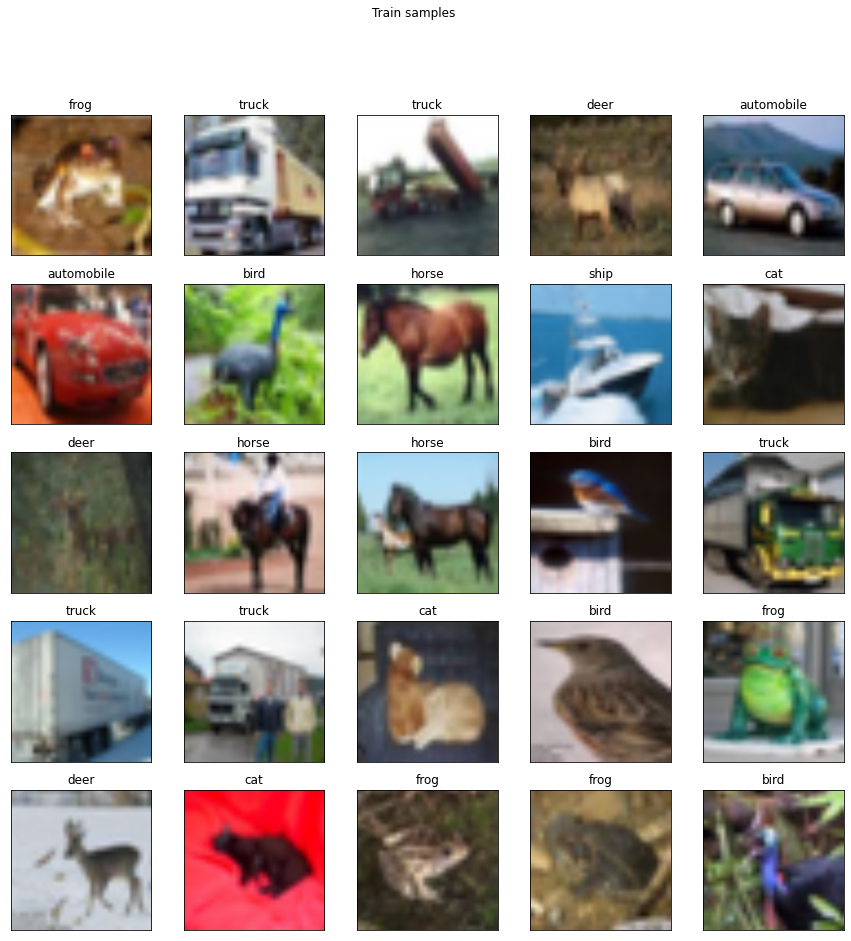

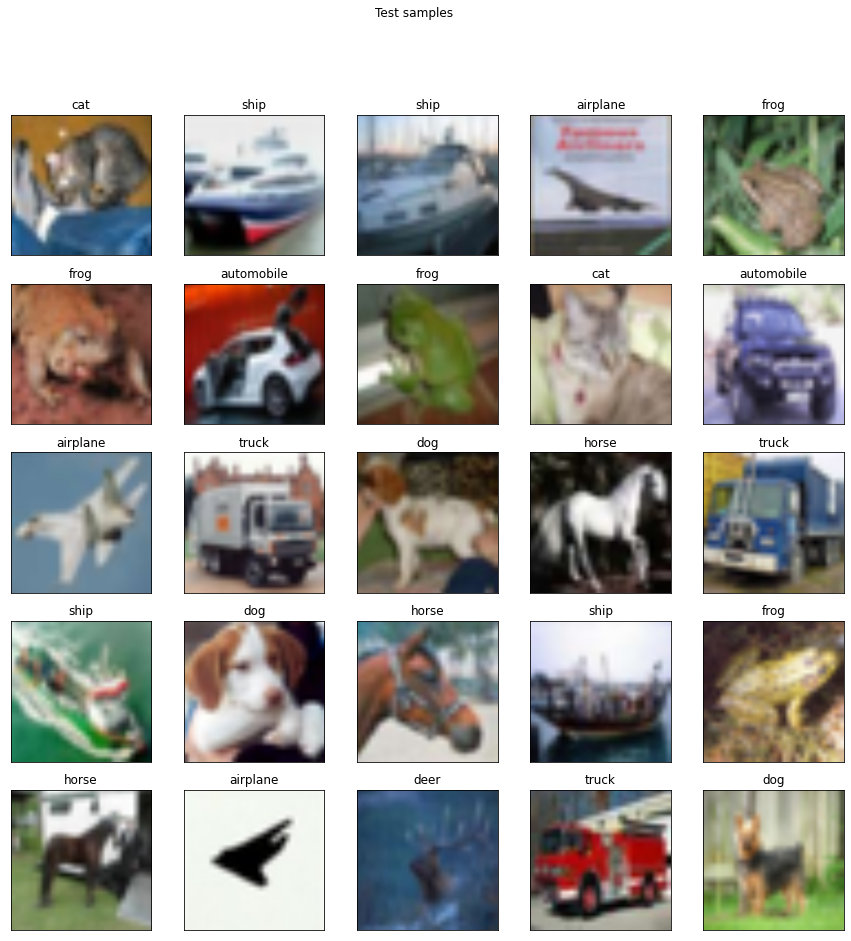

In [ ]:
# Логирование информации о загруженных данных
print('Number of train samples: {}'.format(len(trainset)))
show_images(trainset, 'Train samples')
print('Number of test samples: {}'.format(len(testset)))
show_images(testset, 'Test samples')

In [4]:
# Создание объектов для последовательной загрузки пачек из тренировочной и тестовой выборок
train_data = torch.utils.data.DataLoader(trainset, batch_size = batch_size,
                                                shuffle = True)
test_data = torch.utils.data.DataLoader(testset, batch_size = batch_size,
                                               shuffle = False)

In [5]:
# Выбор устройства для вычислений
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# AlexNet (обучение всех слоев)

In [ ]:
# загрузка модели и вывод информации о ней
alexnet = models.alexnet(pretrained=True)
alexnet.to(device)
print(alexnet)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# модификация последних слоёв модели
alexnet.classifier = nn.Sequential(
                nn.Dropout(p=0.5, inplace=False),
                nn.Linear(9216, 4096, True),
                nn.ReLU(inplace=True),
                nn.Dropout(p=0.5, inplace=False),
                nn.Linear(4096, 1024, True),
                nn.ReLU(inplace=True),
                nn.Linear(1024, 10, True)).to(device)
print(alexnet) # слои, использованные от исходной модели + модифицированные слои классификатора

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
for param in alexnet.parameters():
    print(param.requires_grad)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [ ]:
num_epochs = 10 # количество эпох
# Функция ошибки на этапе обучения
loss_function = nn.CrossEntropyLoss()
# Метод оптимизации для обучения параметров
optimizer = optim.SGD(alexnet.parameters(), lr = 0.001, momentum = 0.9)

In [ ]:
# Функция вычисления точности top-1
def get_accuracy(data_loader, model):
    tp = 0
    n = 0
    with torch.no_grad():
        for images, labels in data_loader: # проход по всем данным
            # Получение выхода сети на входной пачке изображений
            images = images.requires_grad_().to(device)
            labels = labels.to(device)
            outputs = model(images)
            # Выбор максимальных значений выполняется по первой размерности
            _, predicted = torch.max(outputs.data, 1) # записывает индексы 
            n += labels.size(0) # количество изображений, совпадает с batch_size
            tp += (predicted == labels).sum() # определение количества корректных совпадений
    return tp / n

training_start_time = time.time() # отсчет времени перед обучением


for epoch in range(num_epochs):  # проход по эпохам
    for i, (images, labels) in enumerate(train_data): # получение пачки тренировочных данных
        # Загрузка данных на устройство
        images = images.requires_grad_().to(device)
        labels = labels.to(device)
        # Прямой проход
        outputs = alexnet(images) # вычисление выхода сети
        loss = loss_function(outputs, labels) # вычисление функции ошибки, loss.item() дает значение
        # Обратный проход
        optimizer.zero_grad() # обнуление всех вычисляемых градиентов
        loss.backward() # вычисление градиента функции ошибки
        optimizer.step() # обновление параметров модели
    
    # Логирование метрики качества на тренировочных данных по завершении эпохи
    print('Эпоха [{}]: точность = {}'.format(epoch, get_accuracy(train_data, alexnet)))
print('Общее время: {:.2f} s'.format(time.time() - training_start_time))
print("Количество эпох: ", num_epochs)
print("Метод оптимизации:\n ", optimizer)

Эпоха [0]: точность = 0.7414999604225159
Эпоха [1]: точность = 0.8104000091552734
Эпоха [2]: точность = 0.8260599970817566
Эпоха [3]: точность = 0.8643400073051453
Эпоха [4]: точность = 0.8764199614524841
Эпоха [5]: точность = 0.8893799781799316
Эпоха [6]: точность = 0.8959999680519104
Эпоха [7]: точность = 0.9082799553871155
Эпоха [8]: точность = 0.9146999716758728
Эпоха [9]: точность = 0.9286399483680725
Общее время: 1829.07 s
Количество эпох:  10
Метод оптимизации:
  SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [ ]:
# Тестирование обученной модели
test_start_time = time.time()
# Логирование метрики качества на тестовых данных
allacc = [] # храним тестовую точность каждой модели
allacc.append(get_accuracy(test_data, alexnet))
print('Тестовая точность: {}'.format(allacc[0]))
print('Среднее время обработки одного изображения: {} s'.format((time.time() - test_start_time) / (len(test_data) * batch_size)))

Тестовая точность: 0.8671000003814697
Среднее время обработки одного изображения: 0.0013160002981401553 s


# AlexNet: обучение последних модифицированных слоев (веса остальных слоев зафиксированы)

In [ ]:
# загрузка модели и вывод информации о ней
alexnet_freeze = models.alexnet(pretrained=True)
alexnet_freeze.to(device)
print(alexnet_freeze)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
for param in alexnet_freeze.parameters():
    print(param.requires_grad)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [ ]:
# фиксирование весов
for param in alexnet_freeze.parameters():
    param.requires_grad = False

In [ ]:
# модификация последних слоёв модели
alexnet_freeze.classifier = nn.Sequential(
                nn.Dropout(p=0.5, inplace=False),
                nn.Linear(9216, 4096, True),
                nn.ReLU(inplace=True),
                nn.Dropout(p=0.5, inplace=False),
                nn.Linear(4096, 1024, True),
                nn.ReLU(inplace=True),
                nn.Linear(1024, 10, True)).to(device)
print(alexnet_freeze) # слои, использованные от исходной модели + модифицированные слои классификатора

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
for param in alexnet_freeze.parameters():
    print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True


In [ ]:
num_epochs = 10 # количество эпох
# Функция ошибки на этапе обучения
loss_function = nn.CrossEntropyLoss()
# Метод оптимизации для обучения параметров
optimizer = optim.SGD(alexnet_freeze.parameters(), lr = 0.001, momentum = 0.9)

In [ ]:
training_start_time = time.time() # отсчет времени перед обучением
for epoch in range(num_epochs):  # проход по эпохам
    for i, (images, labels) in enumerate(train_data): # получение пачки тренировочных данных
        # Загрузка данных на устройство
        images = images.requires_grad_().to(device)
        labels = labels.to(device)
        # Прямой проход
        outputs = alexnet_freeze(images) # вычисление выхода сети
        loss = loss_function(outputs, labels) # вычисление функции ошибки, loss.item() дает значение
        # Обратный проход
        optimizer.zero_grad() # обнуление всех вычисляемых градиентов
        loss.backward() # вычисление градиента функции ошибки
        optimizer.step() # обновление параметров модели
    
    # Логирование метрики качества на тренировочных данных по завершении эпохи
    print('Эпоха [{}]: точность = {}'.format(epoch, get_accuracy(train_data, alexnet_freeze)))
print('Общее время: {:.2f} s'.format(time.time() - training_start_time))
print("Количество эпох: ", num_epochs)
print("Метод оптимизации:\n ", optimizer)

Эпоха [0]: точность = 0.6094799637794495
Эпоха [1]: точность = 0.6668399572372437
Эпоха [2]: точность = 0.6951000094413757
Эпоха [3]: точность = 0.6953999996185303
Эпоха [4]: точность = 0.7136799693107605
Эпоха [5]: точность = 0.7197200059890747
Эпоха [6]: точность = 0.7264800071716309
Эпоха [7]: точность = 0.7332800030708313
Эпоха [8]: точность = 0.7414599657058716
Эпоха [9]: точность = 0.7379399538040161
Общее время: 1702.55 s
Количество эпох:  10
Метод оптимизации:
  SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [ ]:
# Тестирование обученной модели
test_start_time = time.time()
# Логирование метрики качества на тестовых данных
allacc.append(get_accuracy(test_data, alexnet_freeze))
print('Тестовая точность: {}'.format(allacc[1]))
print('Среднее время обработки одного изображения: {} s'.format((time.time() - test_start_time) / (len(test_data) * batch_size)))

Тестовая точность: 0.717199981212616
Среднее время обработки одного изображения: 0.0013075210628615823 s


# VGG16 (обучение всех слоев)

In [12]:
# загрузка модели и вывод информации о ней
vgg16 = models.vgg16(pretrained=True)
vgg16.to(device)
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [13]:
# модификация последних слоёв модели
vgg16.classifier = nn.Sequential(
                nn.Linear(25088, 4096, True),
                nn.ReLU(),
                nn.Linear(4096, 4096, True),
                nn.ReLU(),
                nn.Dropout(p=0.5, inplace=False),
                nn.Linear(4096, 10, True)).to(device)
print(vgg16) # слои, использованные от исходной модели + модифицированные слои классификатора

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [14]:
for param in vgg16.parameters():
    print(param.requires_grad)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [15]:
num_epochs = 2 # количество эпох
# Функция ошибки на этапе обучения
loss_function = nn.CrossEntropyLoss()
# Метод оптимизации для обучения параметров
optimizer = optim.SGD(vgg16.parameters(), lr = 0.001, momentum = 0.9)

In [16]:
# Функция вычисления точности top-1
def get_accuracy(data_loader, model):
    tp = 0
    n = 0
    with torch.no_grad():
        for images, labels in data_loader: # проход по всем данным
            # Получение выхода сети на входной пачке изображений
            images = images.requires_grad_().to(device)
            labels = labels.to(device)
            outputs = model(images)
            # Выбор максимальных значений выполняется по первой размерности
            _, predicted = torch.max(outputs.data, 1) # записывает индексы 
            n += labels.size(0) # количество изображений, совпадает с batch_size
            tp += (predicted == labels).sum() # определение количества корректных совпадений
    return tp / n

In [17]:
training_start_time = time.time() # отсчет времени перед обучением
for epoch in range(num_epochs):  # проход по эпохам
    for i, (images, labels) in enumerate(train_data): # получение пачки тренировочных данных
        # Загрузка данных на устройство
        images = images.requires_grad_().to(device)
        labels = labels.to(device)
        # Прямой проход
        outputs = vgg16(images) # вычисление выхода сети
        loss = loss_function(outputs, labels) # вычисление функции ошибки, loss.item() дает значение
        # Обратный проход
        optimizer.zero_grad() # обнуление всех вычисляемых градиентов
        loss.backward() # вычисление градиента функции ошибки
        optimizer.step() # обновление параметров модели
    
    # Логирование метрики качества на тренировочных данных по завершении эпохи
    print('Эпоха [{}]: точность = {}'.format(epoch, get_accuracy(train_data, vgg16)))
print('Общее время: {:.2f} s'.format(time.time() - training_start_time))
print("Количество эпох: ", num_epochs)
print("Метод оптимизации:\n ", optimizer)

Эпоха [0]: точность = 0.910860002040863
Эпоха [1]: точность = 0.9416999816894531
Общее время: 1947.37 s
Количество эпох:  2
Метод оптимизации:
  SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [21]:
allacc = []
allacc.append(torch.tensor(0.8671, device='cuda:0'))
allacc.append(torch.tensor(0.7172, device='cuda:0'))
allacc

[tensor(0.8671, device='cuda:0'), tensor(0.7172, device='cuda:0')]

In [22]:
# Тестирование обученной модели
test_start_time = time.time()
# Логирование метрики качества на тестовых данных
allacc.append(get_accuracy(test_data, vgg16))
print('Тестовая точность: {}'.format(allacc[2]))
print('Среднее время обработки одного изображения: {} s'.format((time.time() - test_start_time) / (len(test_data) * batch_size)))

Тестовая точность: 0.8894000053405762
Среднее время обработки одного изображения: 0.004562909056426613 s


# VGG16: обучение последних модифицированных слоев (веса остальных слоев зафиксированы)

In [23]:
# загрузка модели и вывод информации о ней
vgg16_freeze = models.vgg16(pretrained=True)
vgg16_freeze.to(device)
print(vgg16_freeze)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [24]:
for param in vgg16_freeze.parameters():
    print(param.requires_grad)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [25]:
# фиксирование весов
for param in vgg16_freeze.parameters():
    param.requires_grad = False

In [26]:
vgg16_freeze.classifier = nn.Sequential(
                nn.Linear(25088, 4096, True),
                nn.ReLU(),
                nn.Linear(4096, 4096, True),
                nn.ReLU(),
                nn.Dropout(p=0.5, inplace=False),
                nn.Linear(4096, 10, True)).to(device)
print(vgg16_freeze)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [27]:
for param in vgg16_freeze.parameters():
    print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True


In [28]:
num_epochs = 2 # количество эпох
# Функция ошибки на этапе обучения
loss_function = nn.CrossEntropyLoss()
# Метод оптимизации для обучения параметров
optimizer = optim.SGD(vgg16_freeze.parameters(), lr = 0.001, momentum = 0.9)

In [29]:
training_start_time = time.time() # отсчет времени перед обучением
for epoch in range(num_epochs):  # проход по эпохам
    for i, (images, labels) in enumerate(train_data): # получение пачки тренировочных данных
        # Загрузка данных на устройство
        images = images.requires_grad_().to(device)
        labels = labels.to(device)
        # Прямой проход
        outputs = vgg16_freeze(images) # вычисление выхода сети
        loss = loss_function(outputs, labels) # вычисление функции ошибки, loss.item() дает значение
        # Обратный проход
        optimizer.zero_grad() # обнуление всех вычисляемых градиентов
        loss.backward() # вычисление градиента функции ошибки
        optimizer.step() # обновление параметров модели
    
    # Логирование метрики качества на тренировочных данных по завершении эпохи
    print('Эпоха [{}]: точность = {}'.format(epoch, get_accuracy(train_data, vgg16_freeze)))
print('Общее время: {:.2f} s'.format(time.time() - training_start_time))
print("Количество эпох: ", num_epochs)
print("Метод оптимизации:\n ", optimizer)

Эпоха [0]: точность = 0.7308200001716614
Эпоха [1]: точность = 0.8104400038719177
Общее время: 1513.17 s
Количество эпох:  2
Метод оптимизации:
  SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [30]:
# Тестирование обученной модели
test_start_time = time.time()
# Логирование метрики качества на тестовых данных
allacc.append(get_accuracy(test_data, vgg16_freeze))
print('Тестовая точность: {}'.format(allacc[3]))
print('Среднее время обработки одного изображения: {} s'.format((time.time() - test_start_time) / (len(test_data) * batch_size)))

Тестовая точность: 0.7791999578475952
Среднее время обработки одного изображения: 0.004532527059886106 s


#### Уменьшение размера пачки данных из-за ограничений по памяти

In [31]:
# Создание объектов для последовательной загрузки пачек из тренировочной и тестовой выборок
train_data = torch.utils.data.DataLoader(trainset, batch_size = 50,
                                                shuffle = True)
test_data = torch.utils.data.DataLoader(testset, batch_size = 50,
                                               shuffle = False)

# EfficientNet (обучение всех слоев)

In [32]:
# загрузка модели и вывод информации о ней
eff = models.efficientnet_v2_s(pretrained=True)
eff.to(device)
print(eff)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_s-dd5fe13b.pth


  0%|          | 0.00/82.7M [00:00<?, ?B/s]

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [33]:
# модификация последних слоёв модели
eff.classifier = nn.Sequential(
                nn.Dropout(p=0.2, inplace=True),
                nn.Linear(in_features=1280, out_features=10, bias=True)).to(device)
print(eff) # слои, использованные от исходной модели + модифицированные слои классификатора

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [34]:
for param in eff.parameters():
    print(param.requires_grad)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [68]:
num_epochs = 2 # количество эпох
# Функция ошибки на этапе обучения
loss_function = nn.CrossEntropyLoss()
# Метод оптимизации для обучения параметров
optimizer = optim.SGD(eff.parameters(), lr = 0.001, momentum = 0.9)

In [36]:
training_start_time = time.time() # отсчет времени перед обучением
for epoch in range(num_epochs):  # проход по эпохам
    for i, (images, labels) in enumerate(train_data): # получение пачки тренировочных данных
        # Загрузка данных на устройство
        images = images.requires_grad_().to(device)
        labels = labels.to(device)
        # Прямой проход
        outputs = eff(images) # вычисление выхода сети
        loss = loss_function(outputs, labels) # вычисление функции ошибки, loss.item() дает значение
        # Обратный проход
        optimizer.zero_grad() # обнуление всех вычисляемых градиентов
        loss.backward() # вычисление градиента функции ошибки
        optimizer.step() # обновление параметров модели
    
    # Логирование метрики качества на тренировочных данных по завершении эпохи
    print('Эпоха [{}]: точность = {}'.format(epoch, get_accuracy(train_data, eff)))
print('Общее время: {:.2f} s'.format(time.time() - training_start_time))
print("Количество эпох: ", num_epochs)
print("Метод оптимизации:\n ", optimizer)

Эпоха [0]: точность = 0.9570399522781372
Эпоха [1]: точность = 0.9771199822425842
Общее время: 1572.98 s
Количество эпох:  2
Метод оптимизации:
  SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [37]:
# Тестирование обученной модели
test_start_time = time.time()
# Логирование метрики качества на тестовых данных
allacc.append(get_accuracy(test_data, eff))
print('Тестовая точность: {}'.format(allacc[4]))
print('Среднее время обработки одного изображения: {} s'.format((time.time() - test_start_time) / (len(test_data) * batch_size)))

Тестовая точность: 0.9567999839782715
Среднее время обработки одного изображения: 0.0025574458204209805 s


# EfficientNet: обучение последних модифицированных слоев (веса остальных слоев зафиксированы)

In [38]:
# загрузка модели и вывод информации о ней
eff_fr = models.efficientnet_v2_s(pretrained=True)
eff_fr.to(device)
print(eff_fr)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [39]:
for param in eff_fr.parameters():
    print(param.requires_grad)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [40]:
# фиксирование весов
for param in eff_fr.parameters():
    param.requires_grad = False

In [41]:
# модификация последних слоёв модели
eff_fr.classifier = nn.Sequential(
                nn.Dropout(p=0.2, inplace=True),
                nn.Linear(in_features=1280, out_features=10, bias=True)).to(device)
print(eff_fr) # слои, использованные от исходной модели + модифицированные слои классификатора

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [42]:
for param in eff_fr.parameters():
    print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [43]:
num_epochs = 2 # количество эпох
# Функция ошибки на этапе обучения
loss_function = nn.CrossEntropyLoss()
# Метод оптимизации для обучения параметров
optimizer = optim.SGD(eff_fr.parameters(), lr = 0.001, momentum = 0.9)

In [44]:
training_start_time = time.time() # отсчет времени перед обучением
for epoch in range(num_epochs):  # проход по эпохам
    for i, (images, labels) in enumerate(train_data): # получение пачки тренировочных данных
        # Загрузка данных на устройство
        images = images.requires_grad_().to(device)
        labels = labels.to(device)
        # Прямой проход
        outputs = eff_fr(images) # вычисление выхода сети
        loss = loss_function(outputs, labels) # вычисление функции ошибки, loss.item() дает значение
        # Обратный проход
        optimizer.zero_grad() # обнуление всех вычисляемых градиентов
        loss.backward() # вычисление градиента функции ошибки
        optimizer.step() # обновление параметров модели
    
    # Логирование метрики качества на тренировочных данных по завершении эпохи
    print('Эпоха [{}]: точность = {}'.format(epoch, get_accuracy(train_data, eff_fr)))
print('Общее время: {:.2f} s'.format(time.time() - training_start_time))
print("Количество эпох: ", num_epochs)
print("Метод оптимизации:\n ", optimizer)

Эпоха [0]: точность = 0.6944199800491333
Эпоха [1]: точность = 0.7122600078582764
Общее время: 1243.30 s
Количество эпох:  2
Метод оптимизации:
  SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [45]:
# Тестирование обученной модели
test_start_time = time.time()
# Логирование метрики качества на тестовых данных
allacc.append(get_accuracy(test_data, eff_fr))
print('Тестовая точность: {}'.format(allacc[5]))
print('Среднее время обработки одного изображения: {} s'.format((time.time() - test_start_time) / (len(test_data) * batch_size)))

Тестовая точность: 0.7077999711036682
Среднее время обработки одного изображения: 0.0025673419423401355 s


# ResNet (обучение всех слоев)

In [46]:
# загрузка модели и вывод информации о ней
resnet = models.resnet18(pretrained=True)
print(resnet)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [47]:
# модификация последних слоёв модели
resnet.fc = nn.Linear(512, 10, True)
resnet.to(device)
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [48]:
for param in resnet.parameters():
    print(param.requires_grad)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [49]:
num_epochs = 4 # количество эпох
# Функция ошибки на этапе обучения
loss_function = nn.CrossEntropyLoss()
# Метод оптимизации для обучения параметров
optimizer = optim.SGD(resnet.parameters(), lr = 0.001, momentum = 0.9)

In [50]:
training_start_time = time.time() # отсчет времени перед обучением
for epoch in range(num_epochs):  # проход по эпохам
    for i, (images, labels) in enumerate(train_data): # получение пачки тренировочных данных
        # Загрузка данных на устройство
        images = images.requires_grad_().to(device)
        labels = labels.to(device)
        # Прямой проход
        outputs = resnet(images) # вычисление выхода сети
        loss = loss_function(outputs, labels) # вычисление функции ошибки, loss.item() дает значение
        # Обратный проход
        optimizer.zero_grad() # обнуление всех вычисляемых градиентов
        loss.backward() # вычисление градиента функции ошибки
        optimizer.step() # обновление параметров модели
    
    # Логирование метрики качества на тренировочных данных по завершении эпохи
    print('Эпоха [{}]: точность = {}'.format(epoch, get_accuracy(train_data, resnet)))
print('Общее время: {:.2f} s'.format(time.time() - training_start_time))
print("Количество эпох: ", num_epochs)
print("Метод оптимизации:\n ", optimizer)

Эпоха [0]: точность = 0.9435799717903137
Эпоха [1]: точность = 0.9718199968338013
Эпоха [2]: точность = 0.9840199947357178
Эпоха [3]: точность = 0.9929800033569336
Общее время: 1157.91 s
Количество эпох:  4
Метод оптимизации:
  SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [51]:
# Тестирование обученной модели
test_start_time = time.time()
# Логирование метрики качества на тестовых данных
allacc.append(get_accuracy(test_data, resnet))
print('Тестовая точность: {}'.format(allacc[6]))
print('Среднее время обработки одного изображения: {} s'.format((time.time() - test_start_time) / (len(test_data) * batch_size)))

Тестовая точность: 0.94159996509552
Среднее время обработки одного изображения: 0.0010599015839397906 s


# ResNet: обучение последних модифицированных слоев (веса остальных слоев зафиксированы)

In [52]:
# загрузка модели и вывод информации о ней
resnet_fr = models.resnet18(pretrained=True)
print(resnet_fr)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [53]:
for param in resnet_fr.parameters():
    print(param.requires_grad)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [54]:
# фиксирование весов
for param in resnet_fr.parameters():
    param.requires_grad = False

In [55]:
# модификация последних слоёв модели
resnet_fr.fc = nn.Linear(512, 10, True)
resnet_fr.to(device)
print(resnet_fr)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [56]:
for param in resnet_fr.parameters():
    print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True


In [57]:
num_epochs = 4 # количество эпох
# Функция ошибки на этапе обучения
loss_function = nn.CrossEntropyLoss()
# Метод оптимизации для обучения параметров
optimizer = optim.SGD(resnet_fr.parameters(), lr = 0.001, momentum = 0.9)

In [58]:
training_start_time = time.time() # отсчет времени перед обучением
for epoch in range(num_epochs):  # проход по эпохам
    for i, (images, labels) in enumerate(train_data): # получение пачки тренировочных данных
        # Загрузка данных на устройство
        images = images.requires_grad_().to(device)
        labels = labels.to(device)
        # Прямой проход
        outputs = resnet_fr(images) # вычисление выхода сети
        loss = loss_function(outputs, labels) # вычисление функции ошибки, loss.item() дает значение
        # Обратный проход
        optimizer.zero_grad() # обнуление всех вычисляемых градиентов
        loss.backward() # вычисление градиента функции ошибки
        optimizer.step() # обновление параметров модели
    
    # Логирование метрики качества на тренировочных данных по завершении эпохи
    print('Эпоха [{}]: точность = {}'.format(epoch, get_accuracy(train_data, resnet_fr)))
print('Общее время: {:.2f} s'.format(time.time() - training_start_time))
print("Количество эпох: ", num_epochs)
print("Метод оптимизации:\n ", optimizer)

Эпоха [0]: точность = 0.766819953918457
Эпоха [1]: точность = 0.7844199538230896
Эпоха [2]: точность = 0.7912999987602234
Эпоха [3]: точность = 0.7941799759864807
Общее время: 1000.51 s
Количество эпох:  4
Метод оптимизации:
  SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [59]:
# Тестирование обученной модели
test_start_time = time.time()
# Логирование метрики качества на тестовых данных
allacc.append(get_accuracy(test_data, resnet_fr))
print('Тестовая точность: {}'.format(allacc[7]))
print('Среднее время обработки одного изображения: {} s'.format((time.time() - test_start_time) / (len(test_data) * batch_size)))

Тестовая точность: 0.7883999943733215
Среднее время обработки одного изображения: 0.0011172767169773579 s


In [60]:
acc = []
for val in allacc:
  acc.append(val.cpu().detach().numpy())

In [61]:
acc

[array(0.8671, dtype=float32),
 array(0.7172, dtype=float32),
 array(0.8894, dtype=float32),
 array(0.77919996, dtype=float32),
 array(0.9568, dtype=float32),
 array(0.7078, dtype=float32),
 array(0.94159997, dtype=float32),
 array(0.7884, dtype=float32)]

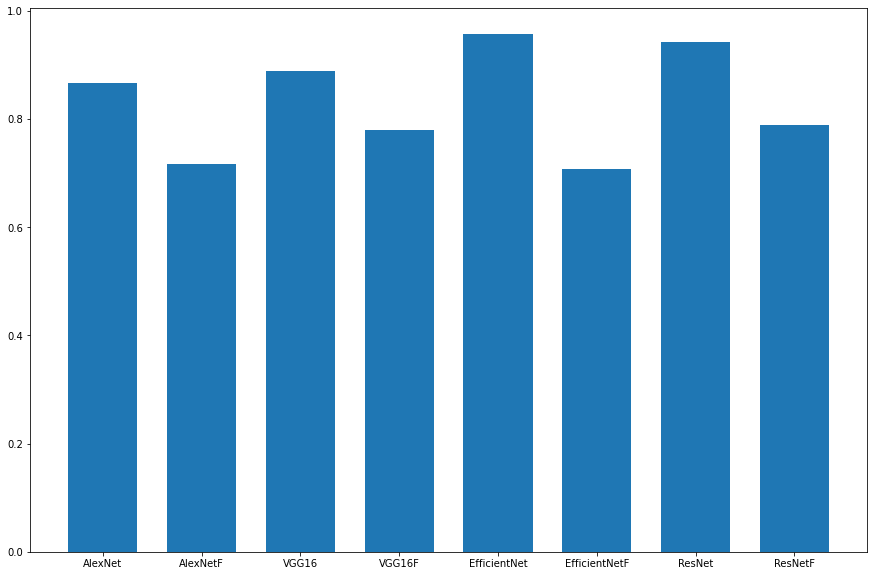

In [63]:
# F означает модель с зафиксированными слоями:
mods = ["AlexNet", "AlexNetF","VGG16", "VGG16F", "EfficientNet", "EfficientNetF", "ResNet", "ResNetF"]
fig, ax = plot.subplots(figsize = (15, 10))
plot.bar(mods, acc, width = 0.7)
plot.show()

In [66]:
best = acc.index(max(acc))
best

4

Наибольшая точность у модели под индексом 4 - это **EfficientNet**

Выведем модифицированные слои этой модели

In [67]:
print(eff.classifier)

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=10, bias=True)
)


Тип эксперимента по переносу обучения - обучение всех весов, без фиксирования слоёв, с модификацией последнего слоя.

In [69]:
# параметры обучения: 2 эпохи и параметры оптимизации:
print(optimizer) 

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


In [70]:
# полученная точность классификации на тестовой выборке:
print(acc[4])

0.9568
